<a href="https://colab.research.google.com/github/erindepree/erindepree/blob/main/Erin_De_Pree_03_quiz_retake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 3
**Version 2**

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, hit **turn in** in the google classroom assignment.

### Quiz Information:
- This is an "**open book**" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. **ANY RESOURCE YOU USE MUST BE CITED** (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism.
- **You may NOT work with anyone else on this quiz **(your classmates, your instructor, etc.).
- You will have **1 hour** to take this quiz.

## Task

You are interviewing with an automobile manufacturer who is interested in hiring a data scientist to help them with product quality. As part of the interview process, they task you with the challenge to see which car attributes yield the highest mpg. Your job is to predict the miles per gallon given various features of automobiles.

## Part 1: Getting the data
The provided dataset (`auto.csv`) consists of various descriptions of cars along with their miles per gallon (mpg). A data dictionary for this dataset is below.

The data dictionary for the dataset is below:

| Variable Name | Description                         | Units                                   |
| ------------- | ----------------------------------- | --------------------------------------- |
| mpg           | miles per gallon                    | miles per gallon                        |
| cylinders     | Number of cylinders                 | between 4 and 8                         |
| displacement  | Engine displacement                 | cubic inches                            |
| horsepower    | Engine horsepower                   | hp                                      |
| weight        | Vehicle weight                      | lbs                                     |
| acceleration  | Time to accelerate from 0 to 60 mph | seconds                                 |
| origin        | Origin of car                       | (1. American, 2. European, 3. Japanese) |

**Read in the data and display the first 5 rows.**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.metrics import

In [2]:
import pandas as pd
mpg = pd.read_csv('https://raw.git.generalassemb.ly/dsb-602/data/master/auto.csv?token=GHSAT0AAAAAAAAAQU2OLMGJZGUDMY7MVMFQ2DVDE5A')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,1


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `origin` column should not be a part of this dataset.
- Any null values in the `cylinders` column are clerical errors. They should all be 4's.
- All columns in this dataset should be numeric. If there are unknown values in any column other than the `cylinders` column, they should be dropped.

**Please clean up the dataset.**

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     194 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 21.9+ KB


In [5]:
mpg.isnull().sum()

,0
mpg,0
cylinders,204
displacement,0
horsepower,0
weight,0
acceleration,0
origin,0


In [6]:
# drop the origin column
mpg = mpg.drop(columns='origin')

In [7]:
# fill missing cylinder values with 4
mpg['cylinders']= mpg['cylinders'].fillna(4)

In [8]:
mpg['horsepower']= mpg['horsepower'].replace(to_replace='?',value= None)
# consulted [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#pandas.DataFrame.replace)

In [9]:
mpg['horsepower'].isnull().sum()

np.int64(6)

In [10]:
mpg.shape

(398, 6)

In [11]:
mpg = mpg.dropna()
mpg.shape

(392, 6)

Consulted the pandas documentation for

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the horsepower column
- A scatterplot of weight compared to acceleration colored orange with a title and axis labels

**Please display these.**

In [12]:
mpg['horsepower'].describe()

,horsepower
count,392
unique,93
top,150.0
freq,22


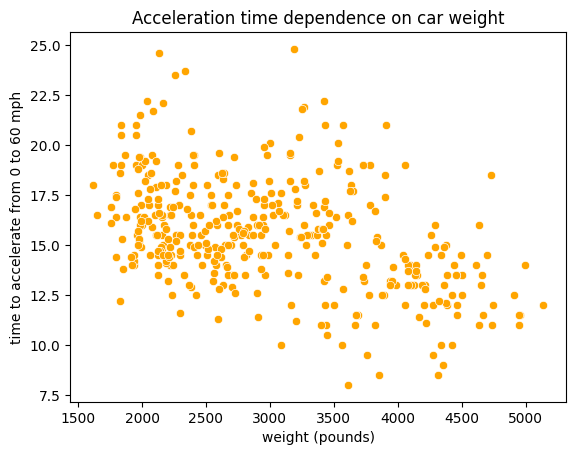

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(mpg, x= 'weight', y= 'acceleration', color='orange', ax=ax)

ax.set_title('Acceleration time dependence on car weight')
ax.set_ylabel('time to accelerate from 0 to 60 mph')
ax.set_xlabel('weight (pounds)');

## Part 4: Modeling

**Fit a linear regression model to predict the car's mpg. You should use all available features in your model.**
* Please use a random state of `1234` when splitting your data
* Use 85% of the dataset for training and the other 15% for testing
* Print out and interpret the testing R<sup>2</sup>.

In [14]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

In [15]:
X = mpg[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']]
y= mpg['mpg']

X.shape, y.shape

((392, 5), (392,))

In [16]:
# train-test-split with 15% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state= 1234)

y_train.shape, y_test.shape # 59/333 = 0.177, about 15%

((333,), (59,))

In [17]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.score(X_train, y_train) # score training set

0.711095007799761

In [19]:
lr.score(X_test, y_test) # score testing set, this is the score we want

0.6736680096349268

$R^2$ tells us that about 68.4% of the variation in mpg can be explained by our model.

## Part 5: Interpretation

The hiring manager is especially interested in learning more about the effects of [horsepower](https://www.britannica.com/science/horsepower) on mpg.

**They ask you what effect the horsepower has on mpg. How would you respond? Be as specific as possible.**

In [20]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['coefs'])

,coefs
cylinders,-0.610143
displacement,0.007260
horsepower,-0.033864
weight,-0.005727
acceleration,0.178248


The coefficient from our fit, $\beta_\text{horsepower} = -0.033864$, tells us that for a 1-unit increase in horsepower, we expect a *decrease* in the car's mpg of $0.034$ mpg, assuming all our factors are held equal.

The variables in this data set are *not* linearly independent.
---

So, here's a quick 1D model.

In [21]:
lr_hp = LinearRegression()

lr_hp.fit(mpg[['horsepower']], mpg['mpg'])

LinearRegression()

In [22]:
lr_hp.coef_

array([-0.15784473])

A 1D model between horsepower and mpg.  If we increase the horsepower by 1-unit, we can expect a $0.157$ mpg *decrease*.  

In [23]:
lr_hp.score(mpg[['horsepower']], mpg['mpg'])

0.6059482578894348

Actually we can explain about 60% of the variability in our data with our model.  I skipped the train-test-split in the interest of time.  That needs to be done for a more exact $R^2$ score.

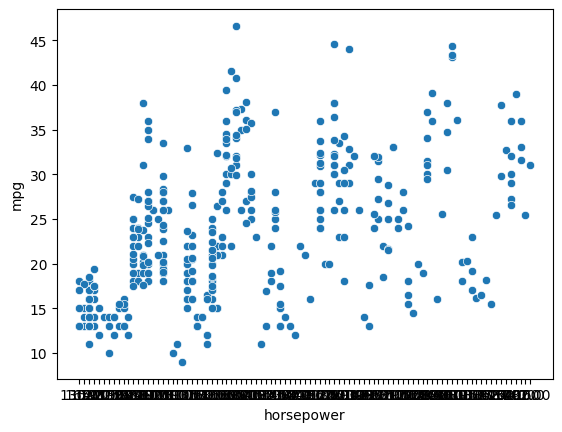

In [24]:
fig, ax= plt.subplots()

sns.scatterplot(x=mpg['horsepower'], y=mpg['mpg']);
# this is messy, apologies.